In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, precision_recall_curve, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostRegressor
import seaborn as sns

In [102]:
df = pd.read_csv('our_project.csv')
print(df.shape)
df.head(10)

(5000, 10)


,Price_Total,Area,Price_Meter,Rooms,Floor_Live,Floor_Total,Zone,Neighborhood,Distance,Time
0,11850601,36.5,324674,1,24,38,ЮВАО,Южнопортовый район,5.0,9.0
1,9265190,34.2,270912,1,15,33,ВАО,Метрогородок,10.5,12.0
2,10594407,34.2,309778,2,7,15,СВАО,Бабушкинский район,12.0,11.0
3,9353943,36.1,259112,1,31,33,ЮАО,Чертаново Южное,18.5,7.0
4,8484026,24.4,347706,0,19,21,ЗАО,Очаково-Матвеевское,12.1,9.0
5,8296707,34.2,242452,1,13,33,ЮАО,Чертаново Южное,18.5,7.0
6,9783011,42.6,229810,1,23,33,ЮАО,Чертаново Южное,18.5,7.0
7,9138416,35.9,254552,2,19,33,СВАО,Отрадное,10.9,19.0
8,13086430,42.5,307916,1,32,38,ЮВАО,Южнопортовый район,5.0,9.0
9,9205334,35.9,256416,1,11,28,ВАО,Гольяново,9.8,11.0


In [103]:
print(df['Zone'].unique())
print(df['Neighborhood'].unique())

#https://habr.com/ru/articles/666234/ - отсюда взят алгоритма для всех категориальных данных к числовым.

encoder = OneHotEncoder()
categorical_features = df[['Zone', 'Neighborhood']]
encoded_features = encoder.fit_transform(categorical_features)
df = df.join(pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names(['Zone', 'Neighborhood'])))

['ЮВАО' 'ВАО' 'СВАО' 'ЮАО' 'ЗАО' 'САО' 'Новая Москва' 'ЮЗАО' 'СЗАО']
['Южнопортовый район' 'Метрогородок' 'Бабушкинский район'
 'Чертаново Южное' 'Очаково-Матвеевское' 'Отрадное' 'Гольяново'
 'Молжаниновский район' 'Московский' 'Филёвский Парк' 'Нагатино-Садовники'
 'Черёмушки' 'Рязанский район' 'Покровское-Стрешнево']


In [104]:
df

,Price_Total,Area,Price_Meter,Rooms,Floor_Live,Floor_Total,Zone,Neighborhood,Distance,Time,...,Neighborhood_Московский,Neighborhood_Нагатино-Садовники,Neighborhood_Отрадное,Neighborhood_Очаково-Матвеевское,Neighborhood_Покровское-Стрешнево,Neighborhood_Рязанский район,Neighborhood_Филёвский Парк,Neighborhood_Чертаново Южное,Neighborhood_Черёмушки,Neighborhood_Южнопортовый район
0,11850601,36.5,324674,1,24,38,ЮВАО,Южнопортовый район,5.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9265190,34.2,270912,1,15,33,ВАО,Метрогородок,10.5,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10594407,34.2,309778,2,7,15,СВАО,Бабушкинский район,12.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9353943,36.1,259112,1,31,33,ЮАО,Чертаново Южное,18.5,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8484026,24.4,347706,0,19,21,ЗАО,Очаково-Матвеевское,12.1,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,15009300,45.9,327000,2,6,29,ЮЗАО,Черёмушки,11.2,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,9764700,26.9,363000,1,22,29,ЮЗАО,Черёмушки,11.2,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4997,8793187,36.2,243040,1,20,33,ЮАО,Чертаново Южное,18.5,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,8226025,34.1,241374,1,9,33,ЮАО,Чертаново Южное,18.5,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


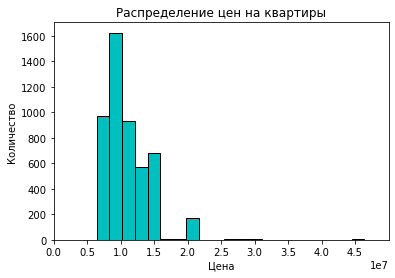

In [105]:
plt.hist(df['Price_Total'], bins=50, color = 'c', edgecolor='black')
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.xlim(0, 50000000)
plt.xticks(range(0, 50000000, 5000000))
plt.show()

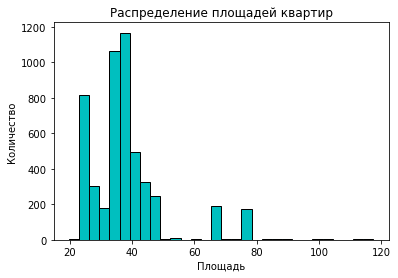

In [106]:
plt.hist(df['Area'], bins=30, color = 'c', edgecolor='black')
plt.title('Распределение площадей квартир')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()

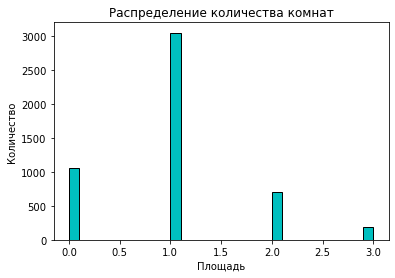

3


In [107]:
plt.hist(df['Rooms'], bins=30, color = 'c', edgecolor='black')
plt.title('Распределение количества комнат')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()
print(max(df['Rooms']))

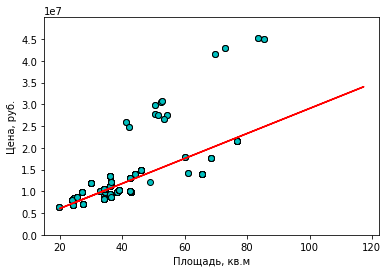

[287269.47710673 322007.03637237]
299168.3336


In [108]:
plt.scatter(df['Area'], df['Price_Total'], color = 'c', edgecolor='black')

fit = np.polyfit(df['Area'], df['Price_Total'], 1)
plt.plot(df['Area'], fit[0] * df['Area'] + fit[1], color='red')

plt.xlabel('Площадь, кв.м')
plt.ylim(0, 50000000)
plt.yticks(range(0, 50000000, 5000000))
plt.ylabel('Цена, руб.')
plt.show()

print(fit)
print(df['Price_Meter'].mean())

<AxesSubplot:xlabel='Floor_Total', ylabel='Rooms'>

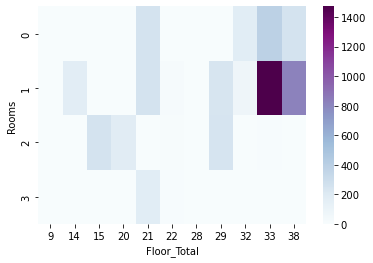

In [109]:
cross_tab = pd.crosstab(df['Rooms'], df['Floor_Total'])
sns.heatmap(cross_tab, cmap='BuPu')